# Diabetes Dataset Analysis and Logistic Regression Modeling

## Section 1: Data Preprocessing

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:

# 1. Load and display the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

# 2. Rename columns
df.rename(columns={
    'Pregnancies': 'Pregnant',
    'BloodPressure': 'BP',
    'SkinThickness': 'Skin',
    'DiabetesPedigreeFunction': 'Pedigree'
}, inplace=True)
df.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:

# 3. Statistical summary
df.describe()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:

# 4. Split into features and target
feature_cols = ['Pregnant', 'BP', 'Insulin', 'BMI', 'Pedigree', 'Age']
X = df[feature_cols]
y = df['Outcome']

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

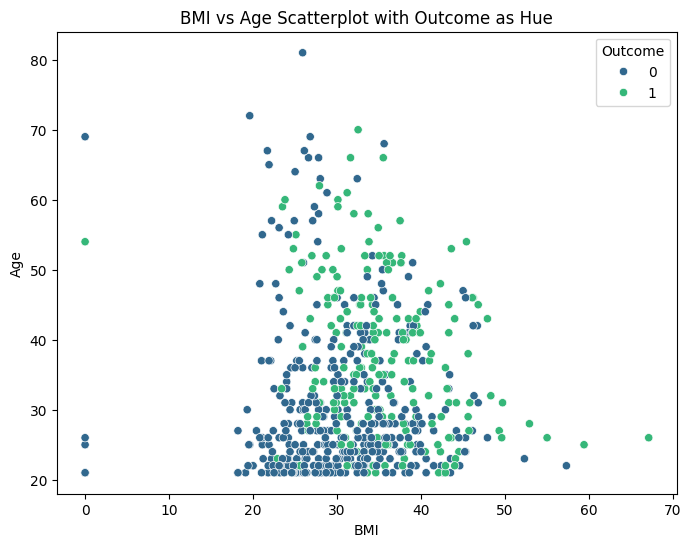

In [9]:

# 5. Scatterplot BMI vs Age with Outcome hue
plt.figure(figsize=(8,6))
sns.scatterplot(x='BMI', y='Age', hue=y_train, data=X_train.assign(Outcome=y_train), palette='viridis')
plt.title('BMI vs Age Scatterplot with Outcome as Hue')
plt.show()

In [10]:
# 6. Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Section 2: Logistic Regression Model

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [12]:

# 7. Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:

# 8. Confusion Matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

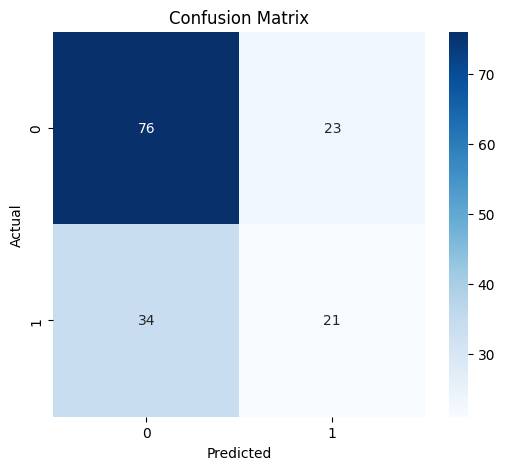

In [14]:

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# 9. Accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}") 

Accuracy: 0.6299
F1-score: 0.4242


In [16]:

# 10. Classification report
print(classification_report(y_test, y_pred, target_names=['without diabetes', 'with diabetes']))


                  precision    recall  f1-score   support

without diabetes       0.69      0.77      0.73        99
   with diabetes       0.48      0.38      0.42        55

        accuracy                           0.63       154
       macro avg       0.58      0.57      0.58       154
    weighted avg       0.61      0.63      0.62       154

